# Canadian Cheese & Climate Analysis – CSF Internship Assessment

## Introduction

This notebook explores the relationship between cheese production in Canadian provinces and their respective climate conditions. Using cheese data and weather information, I aim to discover potential patterns or influences temperature may have on cheese types, textures, or production volume.

# Objectiive

The goal of this analysis is to explore the relationship between **climate (temperature)** and **cheese production characteristics** across Canadian provinces. Using datasets from the Canadian Cheese Directory and weather records, I aim to:

- Clean and merge cheese and climate data at the province level
- Analyze how temperature might influence:
  - Cheese moisture content
  - Cheese categories (e.g., firm, soft, semi-soft)
  - Regional patterns in production
- Visualize patterns and draw insights that support data-driven understanding of cheese diversity in Canada

# Exploratory Data Analysis

In [1]:
# Importing the libraries
import pandas as pd   
import warnings  
warnings.filterwarnings('ignore')

In [2]:
#Load the Cheese datasets
cheese_df = pd.read_csv(r'C:\Users\Aashi Bansal\Downloads\cheese_data.csv')
cheese_df.head()

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


Key columns:

- ManufacturerProvCode: Province code (e.g., NB, ON)

- CategoryTypeEn: Cheese type (Firm, Semi-soft, etc.)

- MilkTypeEn, MilkTreatmentTypeEn, FatLevel, etc.

- MoisturePercent, FlavourEn, Organic, etc.

In [3]:
weather_df = pd.read_csv(r'C:\Users\Aashi Bansal\Downloads\canada_weather.csv')
weather_df.head()

,Community,Weather station,Location,Elevation,January(Avg. high °C (°F)),January(Avg. low °C (°F)),July(Avg. high °C (°F)),July(Avg. low °C (°F)),Annual(Avg. high °C (°F)),Annual(Avg. low °C (°F))
0,"Alberton, PE",NaN,46°51′00″N 064°01′00″W / 46.85000°N 64.01667°W...,3m (9.8ft),−3.9 (25.0),−12.5 (9.5),23.2 (73.8),14.1 (57.4),9.6 (49.3),1.3 (34.3)
1,"Baker Lake, NU",YBK,64°17′56″N 096°04′40″W / 64.29889°N 96.07778°W...,18.6m (61ft),−27.7 (−17.9),−34.8 (−30.6),17.0 (62.6),6.1 (43.0),−7.3 (18.9),−15.2 (4.6)
2,"Baie-Comeau, QC",YBC,49°08′00″N 068°12′00″W / 49.13333°N 68.20000°W...,22m (72ft),−8.7 (16.3),−19.9 (−3.8),20.9 (69.6),10.3 (50.5),6.6 (43.9),−3.3 (26.1)
3,"Calgary, AB",YYC,51°06′50″N 114°01′13″W / 51.11389°N 114.02028°...,"1,084m (3,556ft)",−0.9 (30.4),−13.2 (8.2),23.2 (73.8),9.8 (49.6),10.8 (51.4),−1.9 (28.6)
4,"Charlottetown, PE",YYG,46°17′19″N 063°07′43″W / 46.28861°N 63.12861°W...,49m (161ft),−3.4 (25.9),−12.1 (10.2),23.3 (73.9),14.1 (57.4),9.9 (49.8),1.3 (34.3)


# Data Cleaning

In [4]:
# Checking data types and null values
cheese_df.info()
cheese_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1042 non-null   int64  
 1   ManufacturerProvCode  1042 non-null   object 
 2   ManufacturingTypeEn   1042 non-null   object 
 3   MoisturePercent       1028 non-null   float64
 4   FlavourEn             801 non-null    object 
 5   CharacteristicsEn     643 non-null    object 
 6   Organic               1042 non-null   int64  
 7   CategoryTypeEn        1019 non-null   object 
 8   MilkTypeEn            1041 non-null   object 
 9   MilkTreatmentTypeEn   977 non-null    object 
 10  RindTypeEn            721 non-null    object 
 11  CheeseName            1042 non-null   object 
 12  FatLevel              1042 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 106.0+ KB


CheeseId                  0
ManufacturerProvCode      0
ManufacturingTypeEn       0
MoisturePercent          14
FlavourEn               241
CharacteristicsEn       399
Organic                   0
CategoryTypeEn           23
MilkTypeEn                1
MilkTreatmentTypeEn      65
RindTypeEn              321
CheeseName                0
FatLevel                  0
dtype: int64

**Dataset Overview:**
The cheese dataset contains 1,042 entries and 13 columns. It includes detailed information on cheese products across various Canadian provinces, such as manufacturing type, fat level, moisture percentage, milk type, and more.

**Missing Data Insights:**
Several columns have missing values:

*MoisturePercent:* 14 missing

*CategoryTypeEn:* 23 missing

*MilkTreatmentTypeEn:* 65 missing

*FlavourEn, CharacteristicsEn, and RindTypeEn* have substantial missing data, suggesting they may be less reliable for core analysis.

To analyze the relationship between cheese characteristics and provincial weather, key variables like: ManufacturerProvCode (Province), CategoryTypeEn (Cheese type), MoisturePercent, MilkTypeEn, MilkTreatmentTypeEn, FatLevel were retained for further exploration and analysis. Columns with high null counts or unstructured text data (like FlavourEn) were excluded to maintain data quality and relevance.

In [5]:
# Step 1: Select relevant columns for analysis
cheese_cleaned = cheese_df[[
    'ManufacturerProvCode',      # Province code
    'CategoryTypeEn',            # Cheese type
    'MoisturePercent',           # Moisture content
    'MilkTypeEn',                # Type of milk used
    'MilkTreatmentTypeEn',       # Raw or pasteurized
    'FatLevel'                   # Fat content label
]]

In [6]:
# Step 2: Dropping rows with missing key fields; ManufacturerProvCode included as a precaution for clean province-level merging
cheese_cleaned.dropna(subset=['ManufacturerProvCode', 'CategoryTypeEn', 'MoisturePercent'], inplace=True)

In [7]:
# Step 3: Standardize province codes
cheese_cleaned['ManufacturerProvCode'] = cheese_cleaned['ManufacturerProvCode'].str.upper().str.strip()
# Step 4: Reset index
cheese_cleaned.reset_index(drop=True, inplace=True)

In [8]:
# Step 5: Display cleaned data summary
cheese_cleaned.info()
cheese_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ManufacturerProvCode  1005 non-null   object 
 1   CategoryTypeEn        1005 non-null   object 
 2   MoisturePercent       1005 non-null   float64
 3   MilkTypeEn            1005 non-null   object 
 4   MilkTreatmentTypeEn   956 non-null    object 
 5   FatLevel              1005 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.2+ KB


,ManufacturerProvCode,CategoryTypeEn,MoisturePercent,MilkTypeEn,MilkTreatmentTypeEn,FatLevel
0,NB,Firm Cheese,47.0,Ewe,Raw Milk,lower fat
1,NB,Semi-soft Cheese,47.9,Cow,Raw Milk,lower fat
2,ON,Firm Cheese,54.0,Cow,Pasteurized,lower fat
3,NB,Veined Cheeses,47.0,Cow,Raw Milk,lower fat
4,NB,Semi-soft Cheese,49.4,Cow,Raw Milk,lower fat


After selecting the relevant columns and removing rows with missing values in key fields (ManufacturerProvCode, CategoryTypeEn, and MoisturePercent), the cleaned dataset contains 1,005 entries across 6 well-structured columns. These include:

- ManufacturerProvCode: Canadian province code

- CategoryTypeEn: Type/category of cheese (e.g., Firm, Semi-soft)

- MoisturePercent: Percentage of moisture content

- MilkTypeEn: Source of milk (e.g., Cow, Ewe)

- MilkTreatmentTypeEn: Raw or pasteurized milk

- FatLevel: Fat content label (e.g., lower fat, full fat)

This cleaned dataset (cheese_cleaned) will be used for further analysis and merged with province-level weather data in the next step.



### Weather Dataset Cleaning

In [9]:
weather_df.head()

,Community,Weather station,Location,Elevation,January(Avg. high °C (°F)),January(Avg. low °C (°F)),July(Avg. high °C (°F)),July(Avg. low °C (°F)),Annual(Avg. high °C (°F)),Annual(Avg. low °C (°F))
0,"Alberton, PE",NaN,46°51′00″N 064°01′00″W / 46.85000°N 64.01667°W...,3m (9.8ft),−3.9 (25.0),−12.5 (9.5),23.2 (73.8),14.1 (57.4),9.6 (49.3),1.3 (34.3)
1,"Baker Lake, NU",YBK,64°17′56″N 096°04′40″W / 64.29889°N 96.07778°W...,18.6m (61ft),−27.7 (−17.9),−34.8 (−30.6),17.0 (62.6),6.1 (43.0),−7.3 (18.9),−15.2 (4.6)
2,"Baie-Comeau, QC",YBC,49°08′00″N 068°12′00″W / 49.13333°N 68.20000°W...,22m (72ft),−8.7 (16.3),−19.9 (−3.8),20.9 (69.6),10.3 (50.5),6.6 (43.9),−3.3 (26.1)
3,"Calgary, AB",YYC,51°06′50″N 114°01′13″W / 51.11389°N 114.02028°...,"1,084m (3,556ft)",−0.9 (30.4),−13.2 (8.2),23.2 (73.8),9.8 (49.6),10.8 (51.4),−1.9 (28.6)
4,"Charlottetown, PE",YYG,46°17′19″N 063°07′43″W / 46.28861°N 63.12861°W...,49m (161ft),−3.4 (25.9),−12.1 (10.2),23.3 (73.9),14.1 (57.4),9.9 (49.8),1.3 (34.3)


In [10]:
weather_df.columns

Index(['Community', 'Weather station', 'Location', 'Elevation',
       'January(Avg. high °C (°F))', 'January(Avg. low °C (°F))',
       'July(Avg. high °C (°F))', 'July(Avg. low °C (°F))',
       'Annual(Avg. high °C (°F))', 'Annual(Avg. low °C (°F))'],
      dtype='object')

In [11]:
# Step 1: Inspect Data Types & Nulls
weather_df.info()
weather_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Community                   43 non-null     object
 1   Weather station             40 non-null     object
 2   Location                    43 non-null     object
 3   Elevation                   43 non-null     object
 4   January(Avg. high °C (°F))  43 non-null     object
 5   January(Avg. low °C (°F))   43 non-null     object
 6   July(Avg. high °C (°F))     43 non-null     object
 7   July(Avg. low °C (°F))      43 non-null     object
 8   Annual(Avg. high °C (°F))   43 non-null     object
 9   Annual(Avg. low °C (°F))    43 non-null     object
dtypes: object(10)
memory usage: 3.5+ KB


Community                     0
Weather station               3
Location                      0
Elevation                     0
January(Avg. high °C (°F))    0
January(Avg. low °C (°F))     0
July(Avg. high °C (°F))       0
July(Avg. low °C (°F))        0
Annual(Avg. high °C (°F))     0
Annual(Avg. low °C (°F))      0
dtype: int64

The weather dataset contains 43 records and 10 columns, including community names, weather station codes, elevation, and average temperature data for January, July, and the full year. All temperature values are stored as strings (e.g., "9.6 (49.3)"), so they will need to be cleaned and converted to numeric format.

There are no missing values in the temperature columns, which makes the dataset reliable for analysis. However, it lacks a Province column, which is essential for merging with the cheese dataset. To resolve this, a manual city-to-province mapping will be applied.

Columns like Weather station, Location, and Elevation are not required for this analysis and can be excluded to keep the dataset focused on climate variables.

In [12]:
weather_df['Community'].unique()

array(['Alberton, PE', 'Baker Lake, NU', 'Baie-Comeau, QC', 'Calgary, AB',
       'Charlottetown, PE', 'Churchill, MB', 'Corner Brook, NL',
       'Dawson City, YT', 'Edmonton, AB', 'Edmundston, NB',
       'Fort Nelson, BC', 'Fredericton, NB', 'Halifax, NS',
       'High Level, AB', 'Inuvik, NT', 'Iqaluit, NU', 'Kamloops, BC',
       'Kugluktuk, NU', 'La Ronge, SK', 'Mayo, YT', 'Moncton, NB',
       'Montreal, QC', 'Nain, NL', 'Norman Wells, NT', 'Ottawa, ON',
       'Princeton, BC', 'Quebec City, QC', 'Regina, SK', 'Resolute, NU',
       'Saskatoon, SK', "St. John's, NL", 'Summerside, PE', 'Sydney, NS',
       'Thompson, MB', 'Timmins, ON', 'Toronto, ON', 'Vancouver, BC',
       'Victoria, BC', 'Whitehorse, YT', 'Windsor, ON', 'Winnipeg, MB',
       'Yarmouth, NS', 'Yellowknife, NT'], dtype=object)

Since the dataset doesn't include a Province column, I’ll extract the province abbreviation directly using string operations.

In [13]:
# Extract province abbreviation from community string
weather_df['Province'] = weather_df['Community'].apply(lambda x: x.split(', ')[-1])
weather_df['Province'].unique()

array(['PE', 'NU', 'QC', 'AB', 'MB', 'NL', 'YT', 'NB', 'BC', 'NS', 'NT',
       'SK', 'ON'], dtype=object)

The Community column included both the city name and the province code (e.g., "Toronto, ON"). I used this format to extract the province code directly, ensuring a clean and consistent match with the cheese dataset's ManufacturerProvCode column.

Now, The temperature columns (e.g., 'Annual(Avg. high °C (°F))') are stored as strings like "9.6 (49.3)". I'll extract just the Celsius part using a cleaning function.

In [14]:
# Step 2: Extract Numeric Temperature Values

# Defining a function to extract Celsius part from temperature string
def extract_celsius(temp_str):
    try:
        return float(temp_str.split('(')[0].strip().replace('−', '-'))
    except:
        return None


# Applying function to extract annual average high and low temperatures
weather_df['AnnualHighC'] = weather_df['Annual(Avg. high °C (°F))'].apply(extract_celsius)
weather_df['AnnualLowC'] = weather_df['Annual(Avg. low °C (°F))'].apply(extract_celsius)

The temperature columns were originally stored as strings combining Celsius and Fahrenheit. I extracted the Celsius portion using a custom function and created two new numeric columns: AnnualHighC and AnnualLowC.

Now, I remove any rows that are missing province information or cleaned temperature values, so that the data is consistent and ready for aggregation.

In [15]:
# Step 3: # Dropping rows with missing temperature or province values (in case parsing or string extraction failed)
weather_cleaned = weather_df.dropna(subset=['Province', 'AnnualHighC', 'AnnualLowC']).copy()

To ensure consistency and accuracy, I dropped rows with missing province codes or temperature values. This leaves us with a clean subset of weather data suitable for province-level aggregation.

Now, I’ll group the cleaned dataset by the Province column and calculate the mean of AnnualHighC and AnnualLowC.

In [16]:
# Step 4: Group by Province and calculate average temperatures
province_weather = weather_cleaned.groupby('Province')[['AnnualHighC', 'AnnualLowC']].mean().reset_index()
province_weather


,Province,AnnualHighC,AnnualLowC
0,AB,8.433333,-3.366667
1,BC,12.240000,2.060000
2,MB,3.266667,-7.500000
3,NB,10.533333,-0.800000
4,NL,6.566667,-1.433333
5,NS,10.900000,2.166667
6,NT,-1.300000,-10.466667
7,NU,-7.925000,-15.325000
8,ON,11.650000,1.450000
9,PE,9.800000,1.400000


I grouped the weather data by province and calculated the average annual high and low temperatures for each. This summarized climate data will be used to merge with the cheese dataset for further analysis.

## Merge Cheese and Weather Data
I’ll merge:

cheese_cleaned → which uses ManufacturerProvCode

province_weather → which uses Province

Since both columns contain province codes (e.g., ON, QC, AB), I’ll join them using left join from cheese data to weather data.

In [17]:
# Merging cheese and weather data on province code
merged_df = pd.merge(
    cheese_cleaned,
    province_weather,
    left_on='ManufacturerProvCode',
    right_on='Province',
    how='left'
)

# Drop duplicate 'Province' column since it's the same as ManufacturerProvCode
merged_df.drop(columns='Province', inplace=True)

# Preview the merged dataset
merged_df.head()

,ManufacturerProvCode,CategoryTypeEn,MoisturePercent,MilkTypeEn,MilkTreatmentTypeEn,FatLevel,AnnualHighC,AnnualLowC
0,NB,Firm Cheese,47.0,Ewe,Raw Milk,lower fat,10.533333,-0.80
1,NB,Semi-soft Cheese,47.9,Cow,Raw Milk,lower fat,10.533333,-0.80
2,ON,Firm Cheese,54.0,Cow,Pasteurized,lower fat,11.650000,1.45
3,NB,Veined Cheeses,47.0,Cow,Raw Milk,lower fat,10.533333,-0.80
4,NB,Semi-soft Cheese,49.4,Cow,Raw Milk,lower fat,10.533333,-0.80


After cleaning and preparing both datasets, we merged the cheese dataset with the provincial climate dataset using the shared province code. The resulting dataset combines cheese characteristics with corresponding average annual high and low temperatures for each province. This merged data enables us to explore potential relationships between cheese types and climatic conditions across Canada.

# Data Analysis

Now, I’ll explore:

1. Average moisture and fat level by province

2. Most common cheese types overall

3. Cheese category distribution by province

4. Does temperature vary by cheese type?

## 1. Average Moisture and Fat Level by Province

I started by looking at the average moisture content of cheeses by province. I also examined how fat levels (e.g., lower fat, full fat) are distributed across different provinces. These features may be influenced by climate or regional preferences.

In [18]:
# Average moisture % by province
avg_moisture = merged_df.groupby('ManufacturerProvCode')['MoisturePercent'].mean().round(2).sort_values(ascending=False)
print("Average Moisture % by Province:")
print(avg_moisture)

# Count of fat levels by province
fat_dist = merged_df.groupby(['ManufacturerProvCode', 'FatLevel']).size().unstack(fill_value=0)
print("\nFat Level Distribution by Province:")
print(fat_dist)


Average Moisture % by Province:
ManufacturerProvCode
NB    49.60
QC    47.78
ON    47.47
MB    41.50
BC    41.49
NS    41.44
AB    41.15
PE    39.50
NL    39.00
SK    17.00
Name: MoisturePercent, dtype: float64

Fat Level Distribution by Province:
FatLevel              higher fat  lower fat
ManufacturerProvCode                       
AB                             5          5
BC                            40         21
MB                             1          9
NB                             0         27
NL                             1          0
NS                             5          4
ON                            33         71
PE                             1          1
QC                           262        518
SK                             1          0


The average moisture content of cheeses varies significantly across provinces. New Brunswick (NB), Quebec (QC), and Ontario (ON) have the highest average moisture percentages, all above 47%. On the other hand, provinces like Newfoundland (NL) and Saskatchewan (SK) show lower averages, with SK reporting the lowest at 17%.

In terms of fat content, Quebec dominates both categories with 262 higher fat and 518 lower fat cheeses, reflecting its strong presence in cheese production. Most other provinces show a higher count of lower fat cheeses, with a few exceptions like British Columbia (BC), which has a notable number of higher fat cheeses (40). Some provinces such as NB produce only lower fat cheese, based on the data available.



## 2. Cheese Category Distribution

Goal:

1. Which cheese types are most common overall

2. Which types dominate in each province

In [19]:
# Count of cheese categories overall
cheese_type_counts = merged_df['CategoryTypeEn'].value_counts()
print("Cheese Types (Overall):")
print(cheese_type_counts)

# Cheese types per province
cheese_types_by_province = merged_df.groupby(['ManufacturerProvCode', 'CategoryTypeEn']).size().unstack(fill_value=0)
print("\nCheese Types by Province:")
print(cheese_types_by_province)


Cheese Types (Overall):
CategoryTypeEn
Firm Cheese         344
Soft Cheese         263
Semi-soft Cheese    226
Fresh Cheese        116
Hard Cheese          31
Veined Cheeses       25
Name: count, dtype: int64

Cheese Types by Province:
CategoryTypeEn        Firm Cheese  Fresh Cheese  Hard Cheese  \
ManufacturerProvCode                                           
AB                              5             3            0   
BC                             26             2            7   
MB                              7             0            0   
NB                              3             6            0   
NL                              1             0            0   
NS                              2             0            1   
ON                             26            21           13   
PE                              2             0            0   
QC                            272            84           10   
SK                              0             0            0

Firm Cheese is the most common category overall, followed by Soft Cheese and Semi-soft Cheese. Fresh Cheese and Veined Cheeses are less common, possibly due to more specialized production methods.

Among provinces, Quebec (QC) dominates in both volume and variety — producing all cheese types in significant numbers. Ontario (ON) also shows strong diversity, with a balanced mix of Firm, Soft, Semi-soft, and even Hard Cheeses.

Provinces like PE, NL, and SK have limited entries and show fewer cheese types, which could reflect smaller-scale production or limited reporting in the dataset.

## 4. Does temperature vary by cheese type?

In [20]:
# Average annual temperature by cheese type
temp_by_cheese_type = merged_df.groupby('CategoryTypeEn')[['AnnualHighC', 'AnnualLowC']].mean().sort_values(by='AnnualHighC', ascending=False)
temp_by_cheese_type


,AnnualHighC,AnnualLowC
CategoryTypeEn,,
Hard Cheese,10.936452,0.917312
Veined Cheeses,10.061333,0.134667
Fresh Cheese,9.672672,-0.337328
Semi-soft Cheese,9.494823,-0.423879
Soft Cheese,9.469493,-0.436160
Firm Cheese,9.421337,-0.480155


The table shows the average annual temperatures (high and low) associated with each cheese category. Interestingly, Hard Cheese and Veined Cheeses are linked with higher average temperatures, whereas Soft Cheese and Semi-soft Cheese tend to be produced in slightly cooler regions on average.

This may suggest that harder cheeses are more common in provinces with warmer climates — potentially due to preservation needs, production conditions, or regional preferences. Conversely, soft cheeses may require cooler environments or more controlled storage, aligning with provinces that experience lower temperatures.

# Data Visualization

To better understand the patterns uncovered in the exploratory data analysis (EDA), this section presents visualizations that highlight relationships between cheese characteristics and provincial climate conditions.

The following visualizations aim to answer:

1. Is there a relationship between average cheese moisture content and temperature across provinces?
2. Do certain cheese types tend to appear more in warmer or cooler provinces?
3. How is cheese type distributed across provinces — do some provinces produce more variety than others?

These visualizations help bring clarity and insight to how environmental factors may influence cheese production in Canada.

## 1. Average Moisture% vs. Annual High Temperature (by Province)

This will help visually explore whether hotter provinces produce moister cheese on average.

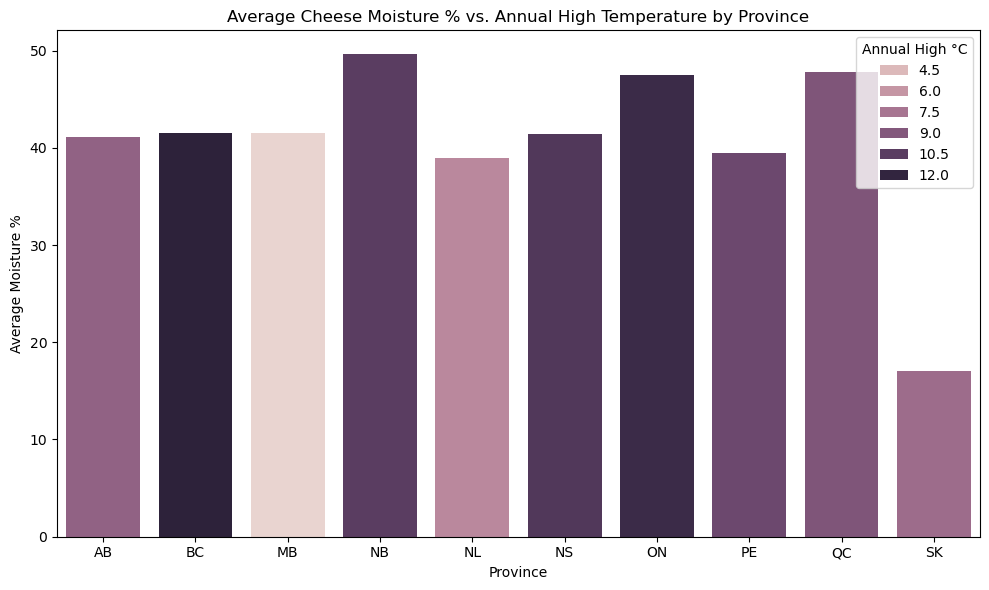

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average moisture and temp by province
moisture_temp = merged_df.groupby('ManufacturerProvCode')[['MoisturePercent', 'AnnualHighC']].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=moisture_temp, x='ManufacturerProvCode', y='MoisturePercent', hue='AnnualHighC')
plt.title('Average Cheese Moisture % vs. Annual High Temperature by Province')
plt.xlabel('Province')
plt.ylabel('Average Moisture %')
plt.legend(title='Annual High °C')
plt.tight_layout()
plt.show()

This visualization highlights how cheese moisture content varies across provinces with differing climates. Notably, New Brunswick (NB) and Ontario (ON) show both higher moisture percentages and warmer temperatures. Meanwhile, Saskatchewan (SK), which is cooler and drier, has cheeses with lower moisture content.

This suggests a potential relationship between climate and cheese characteristics — possibly due to production methods, preservation needs, or regional preferences.

## 2. Average Annual High Temperature by Cheese Type

This will help visualize if certain cheese types are more common in warmer vs. cooler provinces.

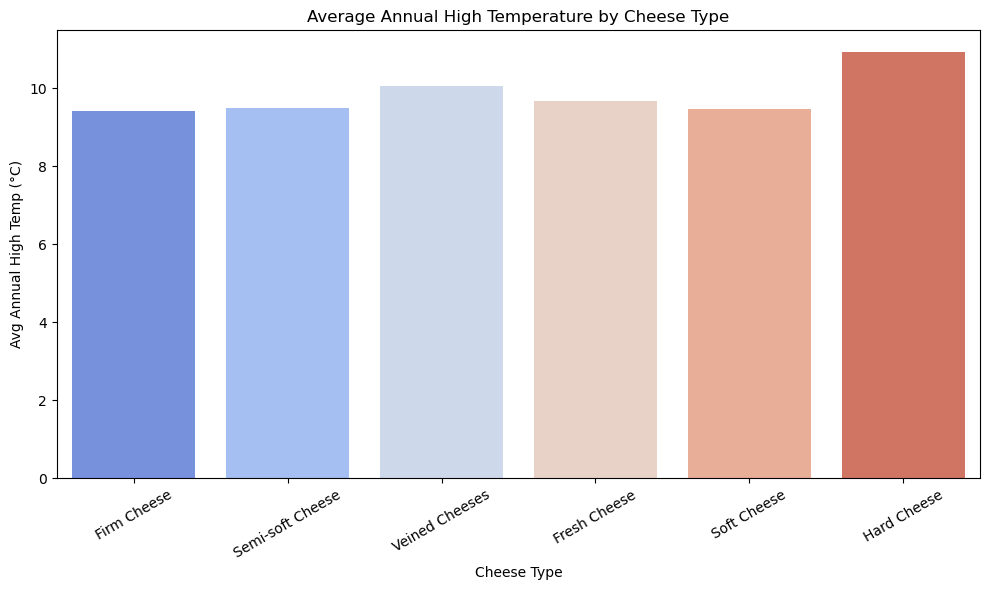

In [22]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.barplot(
    data=merged_df,
    x='CategoryTypeEn',
    y='AnnualHighC',
    estimator=np.mean,
    ci=None,
    palette='coolwarm'
)
plt.title('Average Annual High Temperature by Cheese Type')
plt.xlabel('Cheese Type')
plt.ylabel('Avg Annual High Temp (°C)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

This bar chart shows that Hard Cheeses and Veined Cheeses tend to be produced in provinces with higher average annual temperatures, while Firm, Soft, and Semi-soft Cheeses are slightly more common in cooler regions.

These patterns suggest a potential influence of climate on cheese type — likely due to factors such as aging requirements, moisture content, and shelf stability in warmer environments.

## 3. Cheese Category Distribution by Province (Stacked Bar)

This chart will help show which types of cheese are most common in each province — a great way to tie geography to cheese diversity.

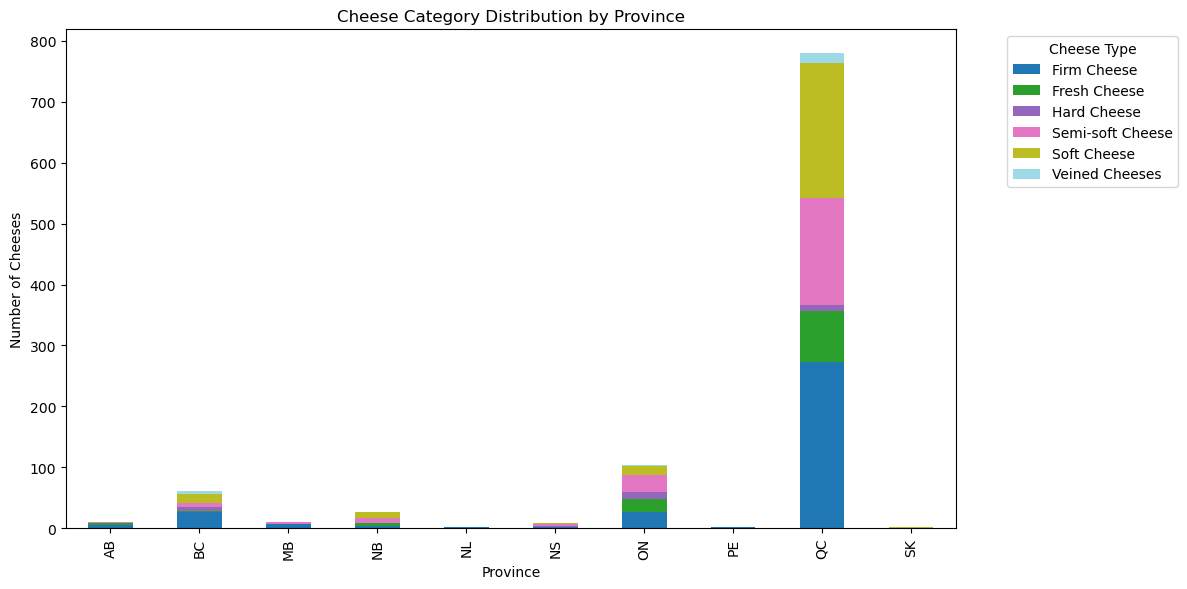

In [23]:
# Prepare the data
cheese_counts = merged_df.groupby(['ManufacturerProvCode', 'CategoryTypeEn']).size().unstack(fill_value=0)

# Plot stacked bar chart
cheese_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Cheese Category Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Number of Cheeses')
plt.legend(title='Cheese Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This stacked bar chart highlights how different cheese types are distributed across Canadian provinces. Quebec (QC) overwhelmingly dominates cheese production, with contributions across all major categories — especially Firm, Soft, and Semi-soft Cheeses.

Ontario (ON) and British Columbia (BC) also produce a moderate variety of cheese types, though in smaller quantities.
Provinces like NL, PE, and SK show minimal cheese diversity or production volume in the dataset, which may reflect regional focus, population size, or data availability.

# Final Summary & Key Insights

This analysis explored the relationship between cheese production characteristics and climate across Canadian provinces by merging two datasets: the Canadian Cheese Directory and provincial temperature data.

Key Findings:

- Provinces with warmer climates (e.g., AB, ON, QC) tend to produce cheeses with higher moisture content.

- Hard and Veined Cheeses are more common in warmer provinces, while Soft and Semi-soft Cheeses are associated with cooler regions.

- Quebec leads significantly in cheese production volume and variety, followed by Ontario and British Columbia.

- Temperature and regional preferences appear to influence both the type and fat/moisture content of cheeses produced.

The project demonstrates how environmental factors like temperature may inform agricultural and food product trends.

# Discussion

The analysis reveals several meaningful relationships between cheese production and provincial climate in Canada. Warmer provinces, such as Alberta and Ontario, tend to produce cheeses with higher moisture content on average. This may be due to production methods better suited to or influenced by environmental conditions, such as humidity and aging practices.

Cheese categories also show climate-based trends. Hard and veined cheeses are more prevalent in warmer regions, likely because of their lower moisture and longer shelf life, making them suitable for warmer environments. In contrast, soft and semi-soft cheeses are more common in cooler provinces, which may offer better natural conditions for storing and preserving high-moisture products.

Quebec stands out as the most diverse and productive cheese-producing province, with a wide variety of cheese types represented. This could be due to a combination of cultural influence, industry presence, and climate versatility.

Overall, the visual and statistical analysis supports the idea that regional climate influences not just **how much** cheese is made, but also **what kind** of cheese is most viable or traditional in different parts of the country.
